In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from csv import reader

In [2]:
df = pd.read_csv('box2hrz-007с.csv')
df

,# id,snap_id,uid,x,y,z,x_pixel,y_pixel,i_sector,M500_msolh,...,gas_frac,star_frac,T_kev,Lx_ergs,Y500c,M_sat_M_cD,cshift,vx,vy,vz
0,860542,28,0,208791.220,203940.950,349847.000,9718,6891,6,1.011170e+15,...,0.125776,0.028659,9.122520,37.872100,102.308640,0.027390,0.027437,-259.72600,-82.91320,-202.92100
1,860543,28,1,314122.000,24372.678,278202.310,14620,15249,15,5.412350e+14,...,0.112946,0.030866,5.959630,7.914490,48.730761,0.111877,0.011779,-282.64600,1.06033,-293.46200
2,860544,28,2,83855.367,206624.140,144593.690,3903,6766,4,7.260400e+14,...,0.120374,0.022724,6.144960,11.553600,59.058935,0.085323,0.063623,-40.43990,-160.57900,-72.43460
3,860545,28,3,327261.750,233165.060,209430.580,15232,5531,7,6.286450e+14,...,0.116089,0.027928,6.192280,34.833100,54.705239,0.063246,0.037204,-9.51925,251.43900,-118.92500
4,860546,28,4,183444.060,193161.880,332979.030,8538,7393,6,2.217660e+14,...,0.116187,0.026047,3.689910,2.097220,23.053572,0.216284,0.028688,870.24200,617.94800,-509.89900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10424,870966,28,15074,304444.090,76153.484,125475.130,14170,12839,15,7.152720e+12,...,0.044805,0.034122,0.390212,0.003211,0.299250,0.317329,0.082210,333.19500,172.07700,70.60560
10425,870967,28,15240,165232.340,66270.766,57933.605,7690,13299,13,7.388280e+12,...,0.054074,0.034059,0.387234,0.007786,0.362322,0.453900,0.090051,-99.56510,104.02400,142.64100
10426,870968,28,15272,272347.840,305951.750,303981.470,12676,2143,3,7.231790e+12,...,0.033251,0.032024,0.447326,0.001472,0.255544,0.001987,0.043893,-333.16800,-55.94300,261.41000
10427,870969,28,15289,111759.160,122749.100,339429.380,5201,10670,9,7.085930e+12,...,0.055285,0.030725,0.341775,0.007282,0.322402,0.242687,0.121855,75.08240,19.83800,-7.41744


In [3]:
df.drop(df[df.M500_msolh < 10**(13.5)].index, inplace=True)
df.drop(df[df.M500_msolh > (1.2*10**(15))].index, inplace=True)
df = df.reset_index(drop=True)
df

,# id,snap_id,uid,x,y,z,x_pixel,y_pixel,i_sector,M500_msolh,...,gas_frac,star_frac,T_kev,Lx_ergs,Y500c,M_sat_M_cD,cshift,vx,vy,vz
0,860542,28,0,208791.220,203940.950,349847.0000,9718,6891,6,1.011170e+15,...,0.125776,0.028659,9.12252,37.872100,102.308640,0.027390,0.027437,-259.72600,-82.91320,-202.9210
1,860543,28,1,314122.000,24372.678,278202.3100,14620,15249,15,5.412350e+14,...,0.112946,0.030866,5.95963,7.914490,48.730761,0.111877,0.011779,-282.64600,1.06033,-293.4620
2,860544,28,2,83855.367,206624.140,144593.6900,3903,6766,4,7.260400e+14,...,0.120374,0.022724,6.14496,11.553600,59.058935,0.085323,0.063623,-40.43990,-160.57900,-72.4346
3,860545,28,3,327261.750,233165.060,209430.5800,15232,5531,7,6.286450e+14,...,0.116089,0.027928,6.19228,34.833100,54.705239,0.063246,0.037204,-9.51925,251.43900,-118.9250
4,860546,28,4,183444.060,193161.880,332979.0300,8538,7393,6,2.217660e+14,...,0.116187,0.026047,3.68991,2.097220,23.053572,0.216284,0.028688,870.24200,617.94800,-509.8990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,862981,28,2440,90735.453,79530.023,349979.1600,4223,12682,13,3.300200e+13,...,0.065329,0.030298,1.15690,0.053976,2.153622,0.203722,0.088741,-306.16800,-259.23700,-238.3570
1508,863048,28,2509,133566.840,252393.580,9162.6074,6216,4636,5,3.541540e+13,...,0.070545,0.026273,0.96024,0.087527,1.976237,0.159104,0.080344,135.81400,-320.82600,-207.7780
1509,863116,28,2577,253364.050,210631.500,54857.3090,11792,6580,6,3.538490e+13,...,0.076147,0.025487,1.05244,0.099174,2.337356,0.371641,0.092072,-268.93100,-265.55500,-101.1440
1510,863268,28,2729,209765.880,327212.190,292273.5000,9763,1153,2,3.325670e+13,...,0.077086,0.026525,1.00023,0.081538,2.202694,0.198966,0.058027,672.49200,413.61100,-191.9870


In [4]:
max(df['Lx_ergs'])

99.3431

In [5]:
#прсмотреть на экстремальное
#df3 = df.copy()
#df3.drop(df[df.Lx_ergs < 250].index, inplace=True)
#df3

In [6]:
#отбор по соотношению масс
df2 = df.copy()
df2.drop(df[(df.M_sat_M_cD) <= (1/4.5)].index, inplace=True)
df2 = df2.reset_index(drop=True)
df2

,# id,snap_id,uid,x,y,z,x_pixel,y_pixel,i_sector,M500_msolh,...,gas_frac,star_frac,T_kev,Lx_ergs,Y500c,M_sat_M_cD,cshift,vx,vy,vz
0,860547,28,5,335807.380,215448.22,165635.800,15630,6355,7,2.297790e+14,...,0.095331,0.031179,4.895500,1.365370,25.394430,0.562556,0.040435,-233.677,-392.1220,-65.4531
1,860555,28,13,253891.410,271543.72,327189.590,11817,3744,2,3.088310e+14,...,0.095138,0.031282,4.734090,2.138910,27.045044,0.297455,0.044714,155.694,108.9540,141.7340
2,860558,28,16,245058.170,265495.53,200450.190,11406,4026,2,3.476820e+14,...,0.111352,0.025329,4.608820,2.890160,32.058224,0.257791,0.112293,-619.123,119.7150,-100.0440
3,860560,28,18,130133.550,243377.64,249034.090,6057,5055,5,2.375600e+14,...,0.091400,0.031373,3.803120,1.193260,19.124716,0.298351,0.016354,168.542,136.3870,17.9686
4,860562,28,20,305749.160,58938.02,257597.950,14231,13640,15,3.042440e+14,...,0.106563,0.031028,4.016290,4.662560,25.573970,0.309922,0.122037,-103.112,-178.6270,-43.4913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,862892,28,2351,216044.270,336619.72,65452.914,10055,715,2,3.727210e+13,...,0.071252,0.024262,1.152130,0.098684,2.436176,0.367495,0.089952,281.227,-271.9830,-314.9610
378,862900,28,2359,317541.690,124987.05,166808.700,14780,10566,11,3.168800e+13,...,0.075579,0.032599,0.984967,0.071369,2.092722,0.430138,0.044194,265.669,-32.9927,200.7600
379,862925,28,2384,94116.781,129738.87,275908.690,4380,10345,9,3.644890e+13,...,0.088982,0.025218,1.115670,0.149404,2.923968,0.443242,0.088582,-130.762,75.5947,-469.2280
380,863116,28,2577,253364.050,210631.50,54857.309,11792,6580,6,3.538490e+13,...,0.076147,0.025487,1.052440,0.099174,2.337356,0.371641,0.092072,-268.931,-265.5550,-101.1440


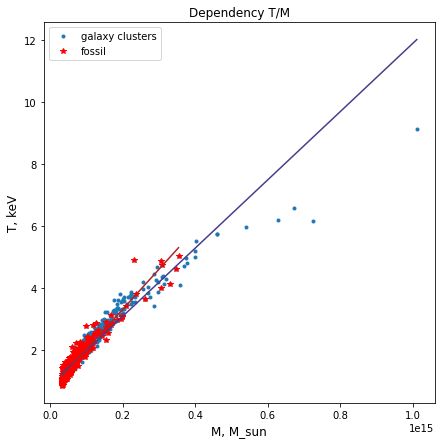

In [7]:
%matplotlib inline

plt.figure(figsize = (7, 7))
plt.plot(df['M500_msolh'], df['T_kev'], '.', label = 'galaxy clusters')
plt.plot(df2['M500_msolh'], df2['T_kev'], '*', color = 'red', label = 'fossil')
plt.xlabel('M, M_sun',fontsize=12)
plt.ylabel('T, keV', fontsize=12)
plt.legend (loc = 'best')
plt.title ('Dependency T/M')
plt.plot(np.unique(df['M500_msolh']), np.poly1d(np.polyfit(df['M500_msolh'], df['T_kev'], 1))(np.unique(df['M500_msolh'])), color = 'darkslateblue')
plt.plot(np.unique(df2['M500_msolh']), np.poly1d(np.polyfit(df2['M500_msolh'], df2['T_kev'], 1))(np.unique(df2['M500_msolh'])), color = 'firebrick')

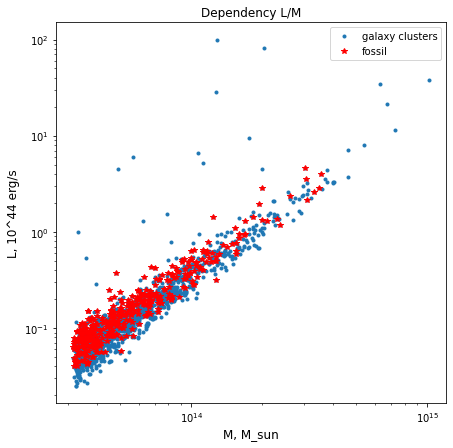

In [8]:
%matplotlib inline


plt.figure(figsize = (7, 7))
plt.plot(df['M500_msolh'], df['Lx_ergs'], '.', label = 'galaxy clusters')
plt.plot(df2['M500_msolh'], df2['Lx_ergs'], '*', color = 'red', label = 'fossil')
plt.xlabel('M, M_sun',fontsize=12)
plt.ylabel('L, 10^44 erg/s', fontsize=12)
plt.legend (loc = 'best')
plt.title ('Dependency L/M')
#plt.plot(np.unique(df2['M500_msolh']), np.poly1d(np.polyfit(df2['M500_msolh'], df2['Lx_ergs'], 1))(np.unique(df2['M500_msolh'])), color = 'darkslateblue')
#plt.plot(np.unique(df4['M500_msolh']), np.poly1d(np.polyfit(df4['M500_msolh'], df4['Lx_ergs'], 1))(np.unique(df4['M500_msolh'])), color = 'firebrick')
#plt.ylim(0,30)
plt.yscale('log')
plt.xscale('log')

<IPython.core.display.Javascript object>


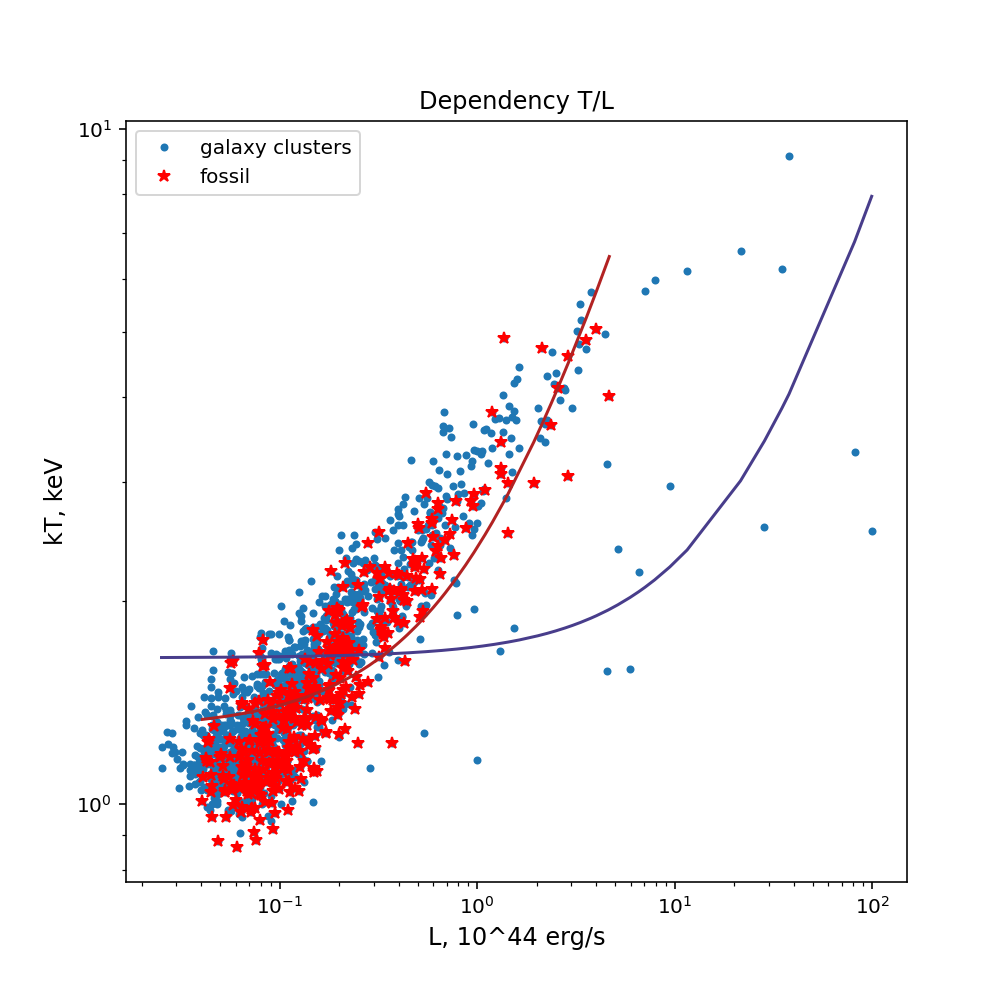

In [10]:
#%matplotlib inline
%matplotlib notebook
plt.figure(figsize = (7, 7))
plt.plot(df['Lx_ergs'], df['T_kev'], '.', label = 'galaxy clusters')
plt.plot(df2['Lx_ergs'], df2['T_kev'], '*', color = 'red', label = 'fossil')
plt.ylabel('kT, keV',fontsize=12)
plt.xlabel('L, 10^44 erg/s', fontsize=12)
plt.legend (loc = 'best')
plt.title ('Dependency T/L')
plt.plot(np.unique(df['Lx_ergs']), np.poly1d(np.polyfit(df['Lx_ergs'], df['T_kev'], 1))(np.unique(df['Lx_ergs'])), color = 'darkslateblue')
plt.plot(np.unique(df2['Lx_ergs']), np.poly1d(np.polyfit(df2['Lx_ergs'], df2['T_kev'], 1))(np.unique(df2['Lx_ergs'])), color = 'firebrick')
plt.yscale('log')
plt.xscale('log')

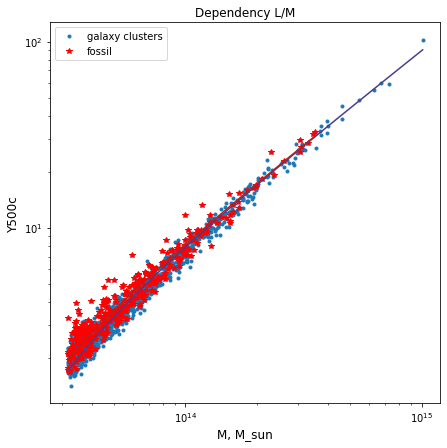

In [11]:
%matplotlib inline
plt.figure(figsize = (7, 7))
plt.plot(df['M500_msolh'], df['Y500c'], '.', label = 'galaxy clusters')
plt.plot(df2['M500_msolh'], df2['Y500c'], '*', color = 'red', label = 'fossil')
plt.xlabel('M, M_sun',fontsize=12)
plt.ylabel('Y500c', fontsize=12)
plt.legend (loc = 'best')
plt.title ('Dependency L/M')
plt.plot(np.unique(df['M500_msolh']), np.poly1d(np.polyfit(df['M500_msolh'], df['Y500c'], 1))(np.unique(df['M500_msolh'])), color = 'darkslateblue')
plt.plot(np.unique(df2['M500_msolh']), np.poly1d(np.polyfit(df2['M500_msolh'], df2['Y500c'], 1))(np.unique(df2['M500_msolh'])), color = 'firebrick')
plt.yscale('log')
plt.xscale('log')

mean gas fraction: 0.074 dispersion 0.013 
 mean gas fractions for fossils: 0.08 
 dispersion 0.012


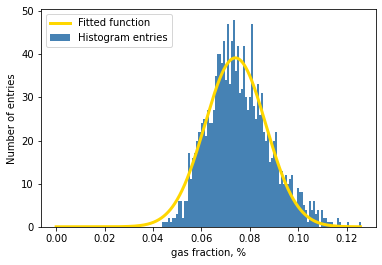

<Figure size 432x288 with 0 Axes>

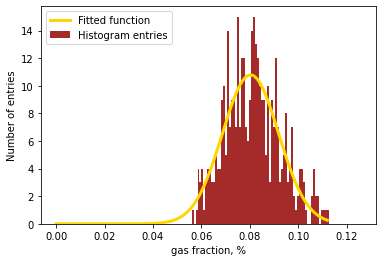

<Figure size 432x288 with 0 Axes>

In [12]:
from scipy.optimize import curve_fit

def fit_function(x, B, mu, sigma):
    return ( B * np.exp(-1.0 * (x - mu)**2 / (2 * sigma**2)))


bins=100
data_entries, bins = np.histogram(df['gas_frac'], bins=bins)
data_entries2, bins = np.histogram(df2['gas_frac'], bins=bins)
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])

popt, pcov = curve_fit(fit_function, xdata=binscenters, ydata=data_entries, p0=[2, 60, 70])
popt2, pcov2 = curve_fit(fit_function, xdata=binscenters, ydata=data_entries2, p0=[2, 60, 70])

xspace = np.linspace(0, max(df['gas_frac']), len(df['gas_frac']))
xspace2 = np.linspace(0, max(df2['gas_frac']), len(df2['gas_frac']))


print('mean gas fraction:', round(popt[1], 3), 'dispersion', round(popt[2],3), '\n', 'mean gas fractions for fossils:', round(popt2[1], 3), '\n', 'dispersion', round(popt2[2], 3))

plt.figure()
plt.bar(binscenters, data_entries, width = bins[1] - bins[0], color = 'steelblue', label='Histogram entries')
plt.plot(xspace, fit_function(xspace, *popt),  color='gold', linewidth=3, label=r'Fitted function')
plt.xlabel(r'gas fraction, %')
plt.ylabel(r'Number of entries')
plt.legend(loc='best')
plt.show()
plt.clf()

plt.figure()
plt.bar(binscenters, data_entries2, width = bins[1] - bins[0], color='brown', label='Histogram entries')
plt.plot(xspace2, fit_function(xspace2, *popt2),  color='gold', linewidth=3, label='Fitted function')
plt.xlabel(r'gas fraction, %')
plt.ylabel(r'Number of entries')
plt.legend(loc='best')
plt.show()
plt.clf()

mean star fraction: 0.032 dispersion -0.004 
 mean star fractions for fossils: 0.03 
 dispersion 0.004


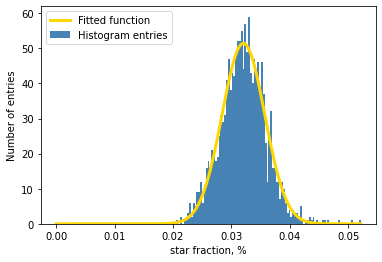

<Figure size 432x288 with 0 Axes>

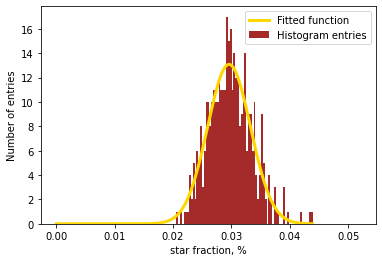

<Figure size 432x288 with 0 Axes>

In [33]:
from scipy.optimize import curve_fit

def fit_function(x, B, mu, sigma):
    return ( B * np.exp(-1.0 * (x - mu)**2 / (2 * sigma**2)))


bins=100
data_entries, bins = np.histogram(df['star_frac'], bins=bins)
data_entries2, bins = np.histogram(df2['star_frac'], bins=bins)
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])

popt, pcov = curve_fit(fit_function, xdata=binscenters, ydata=data_entries, p0=[2, 60, 70])
popt2, pcov2 = curve_fit(fit_function, xdata=binscenters, ydata=data_entries2, p0=[2, 60, 70])

xspace = np.linspace(0, max(df['star_frac']), len(df['star_frac']))
xspace2 = np.linspace(0, max(df2['star_frac']), len(df2['star_frac']))


print('mean star fraction:', round(popt[1], 3), 'dispersion', round(popt[2],3), '\n', 'mean star fractions for fossils:', round(popt2[1], 3), '\n', 'dispersion', round(popt2[2], 3))

plt.figure()
plt.bar(binscenters, data_entries, width = bins[1] - bins[0], color = 'steelblue', label='Histogram entries')
plt.plot(xspace, fit_function(xspace, *popt),  color='gold', linewidth=3, label=r'Fitted function')
plt.xlabel(r'star fraction, %')
plt.ylabel(r'Number of entries')
plt.legend(loc='best')
plt.show()
plt.clf()

plt.figure()
plt.bar(binscenters, data_entries2, width = bins[1] - bins[0], color='brown', label='Histogram entries')
plt.plot(xspace2, fit_function(xspace2, *popt2),  color='gold', linewidth=3, label='Fitted function')
plt.xlabel(r'star fraction, %')
plt.ylabel(r'Number of entries')
plt.legend(loc='best')
plt.show()
plt.clf()

mean cshift 0.037 dispersion 0.016 
 mean cshift for fossils: 276.084 
 dispersion 4434.746


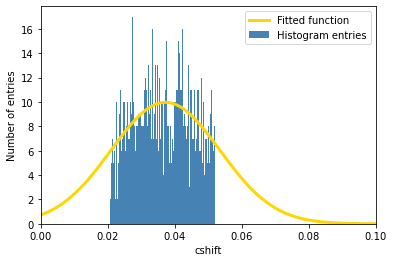

<Figure size 432x288 with 0 Axes>

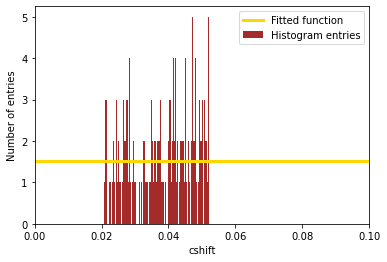

<Figure size 432x288 with 0 Axes>

In [42]:
data_entries, bins = np.histogram(df['cshift'], bins=bins)
data_entries2, bins = np.histogram(df2['cshift'], bins=bins)
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])

popt, pcov = curve_fit(fit_function, xdata=binscenters, ydata=data_entries, p0=[2, 1, 2])
popt2, pcov2 = curve_fit(fit_function, xdata=binscenters, ydata=data_entries2, p0=[1, 0.04, 1])

xspace = np.linspace(0, max(df['cshift']), len(df['cshift']))
xspace2 = np.linspace(0, max(df2['cshift']), len(df2['cshift']))


print('mean cshift', round(popt[1], 3), 'dispersion', round(popt[2],3), '\n', 'mean cshift for fossils:', round(popt2[1], 3), '\n', 'dispersion', round(popt2[2], 3))

plt.figure()
plt.bar(binscenters, data_entries, width = bins[1] - bins[0], color = 'steelblue', label='Histogram entries')
plt.plot(xspace, fit_function(xspace, *popt),  color='gold', linewidth=3, label=r'Fitted function')
plt.xlabel(r'cshift')
plt.ylabel(r'Number of entries')
plt.legend(loc='best')
plt.xlim(0, 0.1)
plt.show()
plt.clf()

plt.figure()
plt.bar(binscenters, data_entries2, width = bins[1] - bins[0], color='brown', label='Histogram entries')
plt.plot(xspace2, fit_function(xspace2, *popt2),  color='gold', linewidth=3, label='Fitted function')
plt.xlabel(r'cshift')
plt.ylabel(r'Number of entries')
plt.legend(loc='best')
plt.xlim(0, 0.1)

plt.show()
plt.clf()